In [7]:
import pandas_datareader.data as web
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report

In [6]:
pip install pandas-datareader

                                              0.0/109.5 kB ? eta -:--:--
     -----------------------------------    102.4/109.5 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 109.5/109.5 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

# Mục mới

In [8]:
df = pd.read_csv('datawithnewsscorev2.csv')


In [10]:
df = df[df.Close > 0]
df.head()

,Unnamed: 0.1,Unnamed: 0,Open,High,Low,Close,Volume,TradingDate,acb_neg,macro_neg,acb_positive,macro_positive,acb_neutral,macro_neutral
0,0,0,4930.0,5030.0,4870.0,4970.0,862200,2012-03-20,0.000000,0.366307,0.000000,0.323059,0.000000,0.310634
1,1,1,4950.0,5050.0,4890.0,4990.0,1608000,2012-03-21,0.000000,0.409755,0.000000,0.204810,0.000000,0.385435
2,2,2,5030.0,5030.0,4910.0,4990.0,578600,2012-03-22,0.041670,0.241943,0.363875,0.260494,0.594455,0.497563
3,3,3,4950.0,5000.0,4910.0,4950.0,1402600,2012-03-23,0.008663,0.335815,0.898860,0.525550,0.092477,0.138635
4,4,4,5050.0,5060.0,4970.0,4990.0,1228700,2012-03-26,0.492117,0.396637,0.498434,0.349834,0.009448,0.253529


# Mục mới

In [11]:
df.fillna(0,inplace=True)

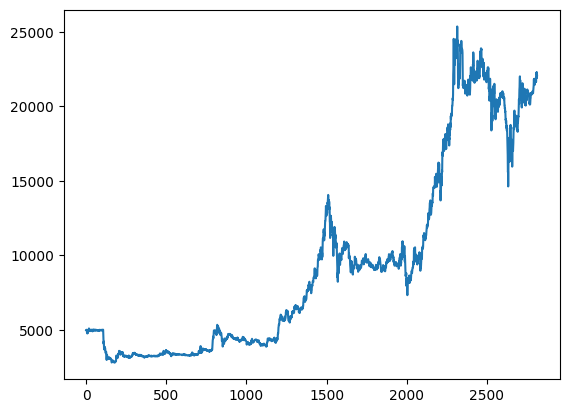

In [12]:
plt.plot(df['Close'])

In [7]:
#Checking columns' name
#df.columns.to_list()

# With Close Price

# Mục mới

In [13]:
df['Return'] = df['Close'].pct_change()
#for checking
show = df[['Close','Return']]
show.head()

,Close,Return
0,4970.0,NaN
1,4990.0,0.004024
2,4990.0,0.000000
3,4950.0,-0.008016
4,4990.0,0.008081


In [14]:
df2=df[['Close']]

df2

,Close
0,4970.0
1,4990.0
2,4990.0
3,4950.0
4,4990.0
...,...
2809,22250.0
2810,22200.0
2811,22300.0
2812,21900.0


In [15]:
# Prediction 100 days into the future.
#future_days = 235
future_days = 235
df2['Prediction'] = df2['Close'].shift(-future_days)

C:\Users\JamesDonKey\AppData\Local\Temp\ipykernel_4020\297129503.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Prediction'] = df2['Close'].shift(-future_days)


In [16]:
X = np.array(df2.drop(['Prediction'], axis= 1))[:-future_days]
print(X)

[[ 4970.]
 [ 4990.]
 [ 4990.]
 ...
 [20300.]
 [20590.]
 [20340.]]


In [17]:
y = np.array(df2['Prediction'])[:-future_days]
print(y)

[ 3220.  3220.  3270. ... 22300. 21900. 22050.]


In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(2063, 1)
(516, 1)
(2063,)
(516,)


In [19]:
from sklearn.ensemble import RandomForestRegressor
# Implementing Linear and Decision Tree Regression Algorithms.
tree = RandomForestRegressor(n_estimators=1000,
                                              criterion='squared_error', 
                                              max_depth=None,
                                              min_samples_split=2,
                                              min_samples_leaf=1, 
                                              min_weight_fraction_leaf=0.0, 
                                              max_features=1.0, 
                                              max_leaf_nodes=None, 
                                              bootstrap=True, 
                                              oob_score=False,
                                              n_jobs=None, 
                                              random_state=None,
                                              verbose=0, 
                                              warm_start=False                                                    
                             ).fit(x_train, y_train)

In [20]:
tree.get_params(deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [21]:
x_future = df2.drop(['Prediction'], axis= 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[23620.],
       [23860.],
       [23790.],
       [23760.],
       [23590.],
       [22450.],
       [21380.],
       [21580.],
       [21690.],
       [21350.],
       [21220.],
       [21480.],
       [21380.],
       [21380.],
       [21420.],
       [21720.],
       [21480.],
       [21690.],
       [21580.],
       [21320.],
       [21050.],
       [20850.],
       [20920.],
       [21120.],
       [21450.],
       [21250.],
       [21120.],
       [21120.],
       [21380.],
       [21050.],
       [21120.],
       [20950.],
       [21080.],
       [21050.],
       [20720.],
       [21050.],
       [20950.],
       [20850.],
       [21020.],
       [21790.],
       [21790.],
       [21790.],
       [21580.],
       [21520.],
       [21380.],
       [21580.],
       [21580.],
       [21220.],
       [21120.],
       [20880.],
       [20780.],
       [20980.],
       [21280.],
       [22050.],
       [21850.],
       [22150.],
       [22620.],
       [22390.],
       [22390.

In [22]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[19363.6807381  20087.38419048 20212.41948413 20222.90426768
 20292.00871429 20402.97471429 20267.13979415 19658.16950494
 20678.69411508 20697.07035714 19963.3577399  20351.08704365
 20267.13979415 20267.13979415 20657.34880303 19728.21736508
 20351.08704365 20678.69411508 19658.16950494 20518.54689286
 20316.29001743 20030.15697619 19965.816      19707.13604762
 20716.60096825 20304.10596429 19707.13604762 19707.13604762
 20267.13979415 20316.29001743 19707.13604762 19889.17585714
 20452.09563414 20316.29001743 20516.84290476 20316.29001743
 19889.17585714 20030.15697619 19515.86667785 19720.04677381
 19720.04677381 19720.04677381 19658.16950494 19298.67513492
 20267.13979415 19658.16950494 19658.16950494 19963.3577399
 19707.13604762 18462.40966667 18579.13885714 19616.41480339
 17421.93258333 19012.39868727 20480.12508894 17982.55520851
 21133.40008333 19093.33360714 19093.33360714 18043.01481629
 19018.16282684 18043.01481629 19012.39868727 17775.08029049
 18043.01481629 17982.555

In [23]:
predictions = tree_prediction 
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

C:\Users\JamesDonKey\AppData\Local\Temp\ipykernel_4020\4118842179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


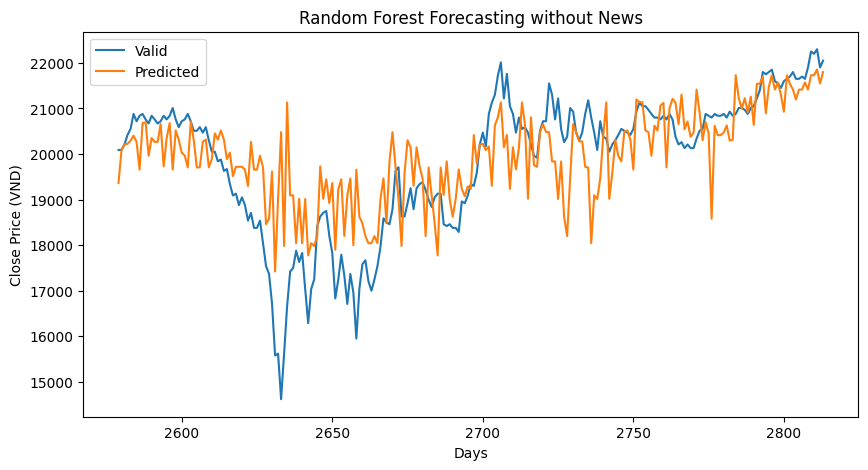

 R2 Score:  0.500699831451932
 MAE:  756.3320703122565


In [24]:
plt.figure(figsize=(10,5))
plt.title("Random Forest Forecasting without News")
plt.xlabel('Days')
plt.ylabel('Close Price (VND)')
#plt.plot(df2['Close'])
plt.plot(valid[['Close', 'Predictions']])
#plt.legend(["Original", "Valid", 'Predicted'])
plt.legend([ "Valid", 'Predicted'])
plt.show()

# chỉ số scoring cho kết quả hồi quy
print(' R2 Score: ', r2_score(valid['Close'],valid['Predictions']))
print(' MAE: ', mean_absolute_error(valid['Close'],valid['Predictions']))

In [25]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,mean_absolute_percentage_error

print('Test R2 Score: ', r2_score(valid['Close'], valid['Predictions']))
print('Test MAE: ', mean_absolute_error(valid['Close'], valid['Predictions']))
print('Test RMSE: ', mean_squared_error(valid['Close'], valid['Predictions'], squared=False))
print('Test MAPE: ',mean_absolute_percentage_error(valid['Close'], valid['Predictions']))

Test R2 Score:  0.500699831451932
Test MAE:  756.3320703122565
Test RMSE:  1067.9227890477964
Test MAPE:  0.04015776386078639


In [26]:
from sklearn.metrics import r2_score
r2_score(valid['Close'],valid['Predictions'])

0.500699831451932

In [27]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(valid['Close'],valid['Predictions'])
print(mae)

756.3320703122565


In [23]:
# With news

In [28]:
list_of_features = ['macro_neg','macro_positive','macro_neutral','acb_neg','Close']
df3 = df[list_of_features]
df3.tail()

,macro_neg,macro_positive,macro_neutral,acb_neg,Close
2809,0.0,0.0,0.0,0.0,22250.0
2810,0.0,0.0,0.0,0.0,22200.0
2811,0.0,0.0,0.0,0.0,22300.0
2812,0.0,0.0,0.0,0.0,21900.0
2813,0.0,0.0,0.0,0.0,22050.0


In [29]:
df3 = pd.DataFrame(df3)     
df3.tail()

,macro_neg,macro_positive,macro_neutral,acb_neg,Close
2809,0.0,0.0,0.0,0.0,22250.0
2810,0.0,0.0,0.0,0.0,22200.0
2811,0.0,0.0,0.0,0.0,22300.0
2812,0.0,0.0,0.0,0.0,21900.0
2813,0.0,0.0,0.0,0.0,22050.0


In [30]:
# Prediction 235 days into the future.
future_days = 235
df3['Prediction'] = df3['Close'].shift(-future_days)

In [31]:
X3 = np.array(df3.drop(['Prediction'], axis= 1))[:-future_days]
print(X3)

[[3.66307173e-01 3.23058960e-01 3.10633842e-01 0.00000000e+00
  4.97000000e+03]
 [4.09755051e-01 2.04809906e-01 3.85435047e-01 0.00000000e+00
  4.99000000e+03]
 [2.41943214e-01 2.60493782e-01 4.97563009e-01 4.16704996e-02
  4.99000000e+03]
 ...
 [2.85868277e-01 2.88777674e-01 4.25354072e-01 3.68868047e-03
  2.03000000e+04]
 [8.04563794e-02 3.86133991e-01 5.33409607e-01 0.00000000e+00
  2.05900000e+04]
 [2.92860699e-01 1.93251844e-01 5.13887481e-01 0.00000000e+00
  2.03400000e+04]]


In [32]:
y3 = np.array(df3['Prediction'])[:-future_days]
print(y)

[ 3220.  3220.  3270. ... 22300. 21900. 22050.]


In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X3, y3, test_size = 0.2)

In [34]:
from sklearn.ensemble import RandomForestRegressor
# Implementing Linear and Decision Tree Regression Algorithms.
tree = RandomForestRegressor(n_estimators=1000).fit(x_train, y_train)

In [35]:
x_future = df3.drop(['Prediction'], axis= 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[2.47790549e-01, 3.84879178e-01, 3.67330275e-01, 0.00000000e+00,
        2.36200000e+04],
       [2.84817704e-01, 3.65127434e-01, 3.50054866e-01, 0.00000000e+00,
        2.38600000e+04],
       [2.36919452e-01, 3.25929277e-01, 4.37151272e-01, 0.00000000e+00,
        2.37900000e+04],
       ...,
       [2.85868277e-01, 2.88777674e-01, 4.25354072e-01, 3.68868047e-03,
        2.03000000e+04],
       [8.04563794e-02, 3.86133991e-01, 5.33409607e-01, 0.00000000e+00,
        2.05900000e+04],
       [2.92860699e-01, 1.93251844e-01, 5.13887481e-01, 0.00000000e+00,
        2.03400000e+04]])

In [36]:
tree_prediction3 = tree.predict(x_future)
print(tree_prediction3)

[20043.87 20037.37 20091.22 19739.97 20627.72 20285.55 20580.59 20443.23
 20569.27 20713.36 20445.   20651.86 20548.86 20607.71 20682.09 20633.32
 20740.72 20593.77 20686.03 20725.35 20276.95 20437.13 20501.9  20628.16
 20463.75 20534.94 20592.25 20655.57 20034.61 20480.1  19621.61 20191.76
 19856.3  20034.95 20661.33 19682.09 19876.72 19393.09 19330.73 19093.67
 19050.36 19272.08 18684.74 19195.53 19252.52 18881.91 18752.73 19061.79
 19927.72 18523.29 18322.66 20164.03 16969.93 16809.82 16777.09 16984.15
 17694.97 18928.5  18165.46 18537.15 18283.8  18264.05 18113.04 18754.33
 17899.98 19484.33 18085.06 20008.61 18833.63 19141.07 18588.72 18735.02
 18030.   18276.89 19848.8  18025.74 17637.15 17792.14 18159.63 17714.2
 20102.25 18241.11 19064.69 17662.47 17961.02 18079.68 19132.25 18662.51
 18856.92 18752.39 18891.55 19383.06 19477.01 19264.1  18740.54 18914.21
 19629.17 19629.63 19408.88 19896.25 18287.53 20063.02 19024.38 18916.72
 20000.17 19354.23 18997.37 19069.14 18784.27 18701.

In [37]:
predictionsnew = tree_prediction3 
valid = df2[X.shape[0]:]
valid['Predictions_new'] = predictionsnew

C:\Users\JamesDonKey\AppData\Local\Temp\ipykernel_4020\2516952431.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions_new'] = predictionsnew


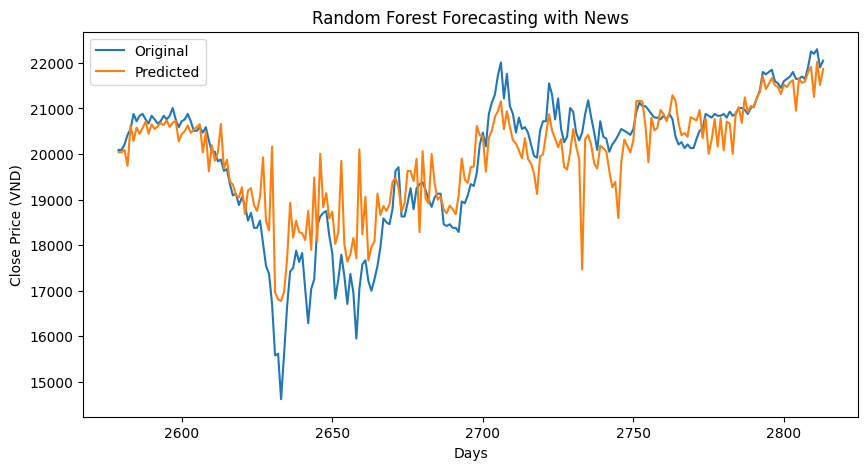

Test R2 Score:  0.7563467169688304
Test MAE:  524.4868085106383
Test RMSE:  746.010829053796
Test MAPE:  0.027810806205210297


In [38]:
plt.figure(figsize=(10,5))
plt.title("Random Forest Forecasting with News")
plt.xlabel('Days')
plt.ylabel('Close Price (VND)')
#plt.plot(df2['Close'])
plt.plot(valid[['Close', 'Predictions_new']])
plt.legend(["Original",  'Predicted'])
plt.show()

# chỉ số scoring cho kết quả hồi quy
#print(' R2 Score: ', r2_score(valid['Close'],valid['Predictions_new']))
#print(' MAE: ', mean_absolute_error(valid['Close'],valid['Predictions_new']))


from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,mean_absolute_percentage_error

print('Test R2 Score: ', r2_score(valid['Close'], valid['Predictions_new']))
print('Test MAE: ', mean_absolute_error(valid['Close'], valid['Predictions_new']))
print('Test RMSE: ', mean_squared_error(valid['Close'], valid['Predictions_new'], squared=False))
print('Test MAPE: ',mean_absolute_percentage_error(valid['Close'], valid['Predictions_new']))

In [39]:
from sklearn.metrics import r2_score
r_squared=r2_score(valid['Close'],valid['Predictions_new'])
print(r_squared)

0.7563467169688304


In [40]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(valid['Close'],valid['Predictions_new'])
print(mae)

524.4868085106383
